In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time




In [3]:
df = pd.read_excel(r"C:\Users\Atefah\Desktop\IRONHACK\cofee_shop_sale\Coffee Shop Sales.xlsx")

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.shape

(149116, 11)

In [6]:
# check the missing values
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [7]:
# check the unique values in all columns
print(df.nunique())

transaction_id      149116
transaction_date       181
transaction_time     25762
transaction_qty          6
store_id                 3
store_location           3
product_id              80
unit_price              41
product_category         9
product_type            29
product_detail          80
dtype: int64


In [8]:
# check the data types
print(df.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object


In [9]:
# convert the "transaction_date" column to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [10]:
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [11]:
# check the data types of transaction time column
print(df['transaction_date'].dtypes)

datetime64[ns]


In [12]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time


In [13]:
print(df['transaction_time'].dtypes)

object


In [14]:
print(df['transaction_date'].dtypes)

datetime64[ns]


In [15]:
# check the unique value is store location
print(df['store_location'].unique())

['Lower Manhattan' "Hell's Kitchen" 'Astoria']


C:\Users\Atefah\AppData\Local\Temp\ipykernel_13764\1748930639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top3_stores.index, y=top3_stores.values, palette='viridis')


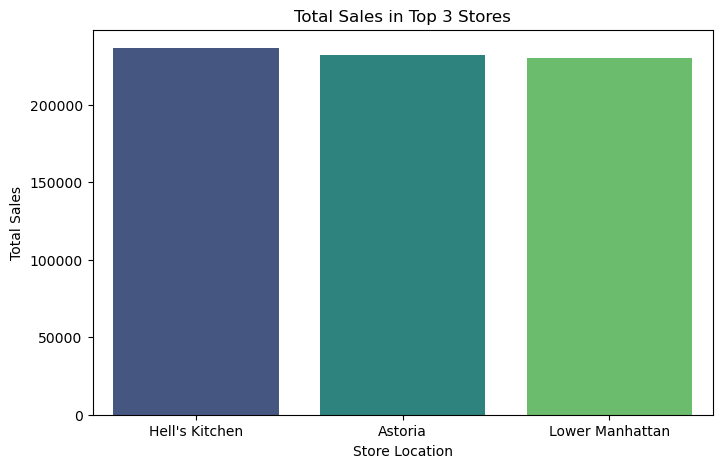

In [16]:
# Calculate total sales per store
df['total_sales'] = df['transaction_qty'] * df['unit_price']
top3_stores = df.groupby('store_location')['total_sales'].sum().nlargest(3)

# Plot total sales for the top 3 stores
plt.figure(figsize=(8, 5))
sns.barplot(x=top3_stores.index, y=top3_stores.values, palette='viridis')
plt.title('Total Sales in Top 3 Stores')
plt.ylabel('Total Sales')
plt.xlabel('Store Location')
plt.show()

In [17]:
# Add 'month', 'week', and 'hour' columns if not already present
df['month'] = df['transaction_date'].dt.to_period('M')
df['week'] = df['transaction_date'].dt.isocalendar().week
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

# Add 'total_sales' column if not already present
df['total_sales'] = df['transaction_qty'] * df['unit_price']



In [18]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,week,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01,52,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,52,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01,52,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01,52,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,52,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06,26,20
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06,26,20
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06,26,20
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06,26,20


In [19]:
# Save the updated DataFrame
df.to_csv('coffee_shop_sales_with_time_features.csv', index=False)

In [20]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,week,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01,52,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,52,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01,52,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01,52,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,52,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06,26,20
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06,26,20
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06,26,20
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06,26,20


In [21]:
# Replace 'week' column with 'day_of_week' (0=Monday, 6=Sunday)
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# Save the updated DataFrame to CSV
df.to_csv('coffee_shop_sales_with_dayofweek.csv', index=False)

In [22]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,week,hour,day_of_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01,52,7,6
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,52,7,6
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01,52,7,6
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01,52,7,6
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,52,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06,26,20,4
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06,26,20,4
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06,26,20,4
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06,26,20,4


In [23]:
# Remove the 'week' column from the DataFrame if it exists
if 'week' in df.columns:
    df = df.drop(columns=['week'])

# Save the updated DataFrame to CSV
df.to_csv('coffee_shop_sales_cleaneddd.csv', index=False)

In [24]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,day_of_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01,7,6
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,7,6
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01,7,6
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01,7,6
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06,20,4
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06,20,4
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06,20,4
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06,20,4


In [25]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,day_of_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01,7,6
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,7,6
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01,7,6
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01,7,6
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06,20,4
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06,20,4
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06,20,4
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06,20,4


In [26]:
# Calculate total revenue per month
monthly_total_revenue = df.groupby('month')['total_sales'].sum()
print(monthly_total_revenue)

month
2023-01     81677.74
2023-02     76145.19
2023-03     98834.68
2023-04    118941.08
2023-05    156727.76
2023-06    166485.88
Freq: M, Name: total_sales, dtype: float64


In [27]:
monthly_total_revenue.to_csv('total_revenue_per_month.csv', header=True)

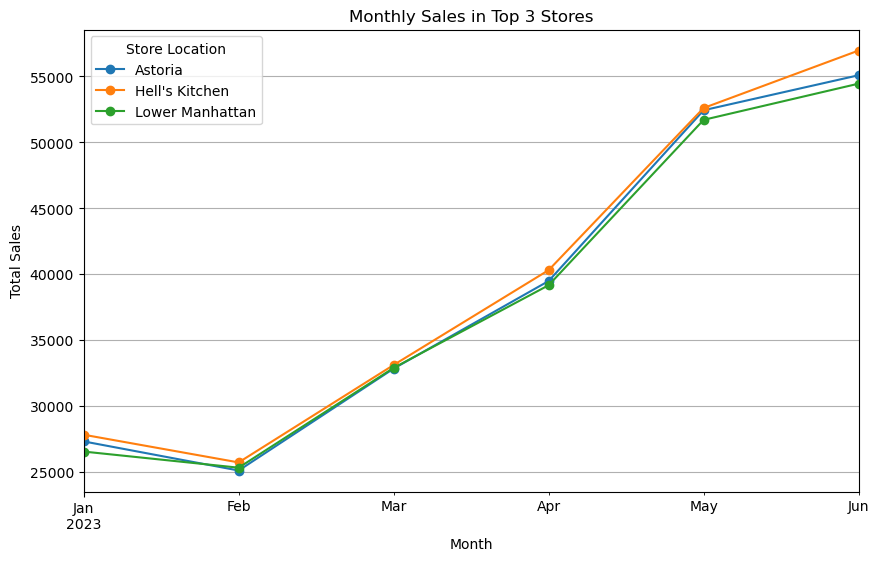

In [28]:
# Extract month from transaction_date
df['month'] = df['transaction_date'].dt.to_period('M')

# Filter data for the top 3 stores
top3_store_names = top3_stores.index.tolist()
df_top3 = df[df['store_location'].isin(top3_store_names)]

# Group by month and store_location, then sum total_sales
monthly_sales = df_top3.groupby(['month', 'store_location'])['total_sales'].sum().reset_index()

# Pivot for plotting
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='store_location', values='total_sales')

# Plot
monthly_sales_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Sales in Top 3 Stores')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend(title='Store Location')
plt.grid(True)
plt.show()

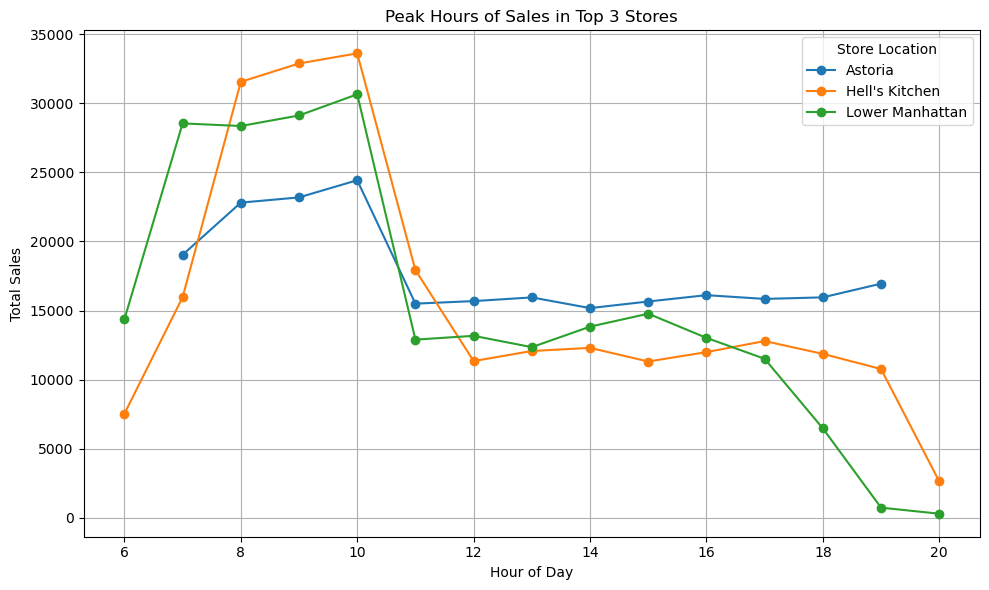

In [29]:
# Extract hour from transaction_time
df['hour'] = df['transaction_time'].apply(lambda t: t.hour)

# Filter for top 3 stores
df_peak = df[df['store_location'].isin(top3_store_names)]

# Group by hour and store_location, sum total_sales
hourly_sales = df_peak.groupby(['hour', 'store_location'])['total_sales'].sum().reset_index()

# Pivot for plotting
hourly_sales_pivot = hourly_sales.pivot(index='hour', columns='store_location', values='total_sales')

# Plot
hourly_sales_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Peak Hours of Sales in Top 3 Stores')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.legend(title='Store Location')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Atefah\AppData\Local\Temp\ipykernel_13764\661350892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='mako')


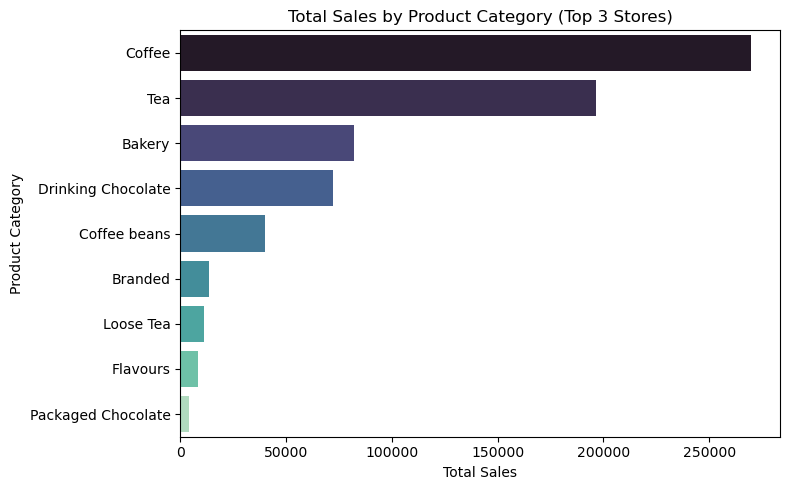

In [30]:
# Calculate total sales by product category for the top 3 stores
category_sales = df[df['store_location'].isin(top3_store_names)].groupby('product_category')['total_sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='mako')
plt.title('Total Sales by Product Category (Top 3 Stores)')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [31]:
# Find the peak hour for each store (hour with highest total sales)
peak_hours = hourly_sales.groupby('store_location')['total_sales'].idxmax()
peak_hour_values = hourly_sales.loc[peak_hours][['store_location', 'hour']]

# For each store, find the top-selling product category during its peak hour
results = []
for _, row in peak_hour_values.iterrows():
    store = row['store_location']
    hour = row['hour']
    df_store_hour = df_peak[(df_peak['store_location'] == store) & (df_peak['hour'] == hour)]
    top_category = df_store_hour.groupby('product_category')['total_sales'].sum().idxmax()
    top_sales = df_store_hour.groupby('product_category')['total_sales'].sum().max()
    results.append({'store_location': store, 'peak_hour': hour, 'top_category': top_category, 'sales': top_sales})

# Display results as a DataFrame
pd.DataFrame(results)

,store_location,peak_hour,top_category,sales
0,Astoria,10,Coffee,9058.3
1,Hell's Kitchen,10,Coffee,12682.2
2,Lower Manhattan,10,Coffee,11556.6


In [32]:
# Find the peak transaction hour (with the highest number of transactions) for each store
peak_transaction_hours = df.groupby(['store_location', 'hour'])['transaction_id'].count().reset_index()
peak_transaction_hours = peak_transaction_hours.sort_values(['store_location', 'transaction_id'], ascending=[True, False])

# Get the peak hour for each store
peak_hours_per_store = peak_transaction_hours.groupby('store_location').first().reset_index()
peak_hours_per_store.rename(columns={'hour': 'peak_hour', 'transaction_id': 'transaction_count'}, inplace=True)

print(peak_hours_per_store)

    store_location  peak_hour  transaction_count
0          Astoria         10               5291
1   Hell's Kitchen         10               6957
2  Lower Manhattan         10               6297


In [33]:
# Display unique items in the 'product_category' column
print(df['product_category'].unique())

['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [34]:
# Display unique values in the 'unit_price' column
print(df['unit_price'].unique())

[ 3.    3.1   4.5   2.    4.25  3.5   2.55  3.75  2.5   4.75  3.25  4.
  2.2   2.45  0.8   8.95 21.   28.    6.4  19.75 12.   18.    9.5  10.
 20.45  9.25 22.5  14.75  7.6  14.   10.95 13.33 15.    4.38  4.06  5.63
  4.69 45.   23.    2.1   2.65]









•	
•	Revenue per Item: Better margin analysis


What products sell best on weekends vs weekdays?

In [35]:
# Add a 'day_of_week' column (0=Monday, 6=Sunday)
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# Add a 'weekend' column: True for Saturday(5) and Sunday(6)
df['weekend'] = df['day_of_week'].isin([5, 6])

# Group by weekend/weekday and product_category, sum total_sales
sales_by_daytype = df.groupby(['weekend', 'product_category'])['total_sales'].sum().reset_index()

# Find top 5 selling categories for weekdays and weekends
top_weekday = sales_by_daytype[sales_by_daytype['weekend'] == False].sort_values('total_sales', ascending=False).head(5)
top_weekend = sales_by_daytype[sales_by_daytype['weekend'] == True].sort_values('total_sales', ascending=False).head(5)

print("Top 5 product categories on weekdays:")
print(top_weekday[['product_category', 'total_sales']])

print("\nTop 5 product categories on weekends:")
print(top_weekend[['product_category', 'total_sales']])

Top 5 product categories on weekdays:
     product_category  total_sales
2              Coffee    194646.80
8                 Tea    141955.75
0              Bakery     59453.09
4  Drinking Chocolate     52205.75
3        Coffee beans     28540.15

Top 5 product categories on weekends:
      product_category  total_sales
11              Coffee     75305.65
17                 Tea     54450.20
9               Bakery     22862.55
13  Drinking Chocolate     20210.25
12        Coffee beans     11545.10


In [36]:
# Save the top 5 product categories for weekdays and weekends to CSV files
top_weekday[['product_category', 'total_sales']].to_csv('top5_weekday_categories.csv', index=False)
top_weekend[['product_category', 'total_sales']].to_csv('top5_weekend_categories.csv', index=False)

PEAK HOUR IN WEEKDAYS AND WEEKENDS 

In [37]:
# The code above only computes and prints peak hours; it does not modify df.
# To save the peak hour info in df, add two new columns: 'peak_weekday_hour' and 'peak_weekend_hour' (same value for all rows).

# Find peak sales hour for weekdays and weekends
sales_by_hour_daytype = df.groupby(['weekend', 'hour'])['total_sales'].sum().reset_index()
peak_weekday = sales_by_hour_daytype[sales_by_hour_daytype['weekend'] == False].sort_values('total_sales', ascending=False).iloc[0]
peak_weekend = sales_by_hour_daytype[sales_by_hour_daytype['weekend'] == True].sort_values('total_sales', ascending=False).iloc[0]

print(f"Peak weekday hour: {peak_weekday['hour']} (Total Sales: {peak_weekday['total_sales']:.2f})")
print(f"Peak weekend hour: {peak_weekend['hour']} (Total Sales: {peak_weekend['total_sales']:.2f})")

# Add columns to df
df['peak_weekday_hour'] = peak_weekday['hour']
df['peak_weekend_hour'] = peak_weekend['hour']

# Save updated DataFrame
df.to_csv('coffee_shop_sales_with_peak_hours.csv', index=False)

Peak weekday hour: 10 (Total Sales: 63554.16)
Peak weekend hour: 10 (Total Sales: 25119.23)


C:\Users\Atefah\AppData\Local\Temp\ipykernel_13764\2700596999.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Atefah\AppData\Local\Temp\ipykernel_13764\2700596999.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


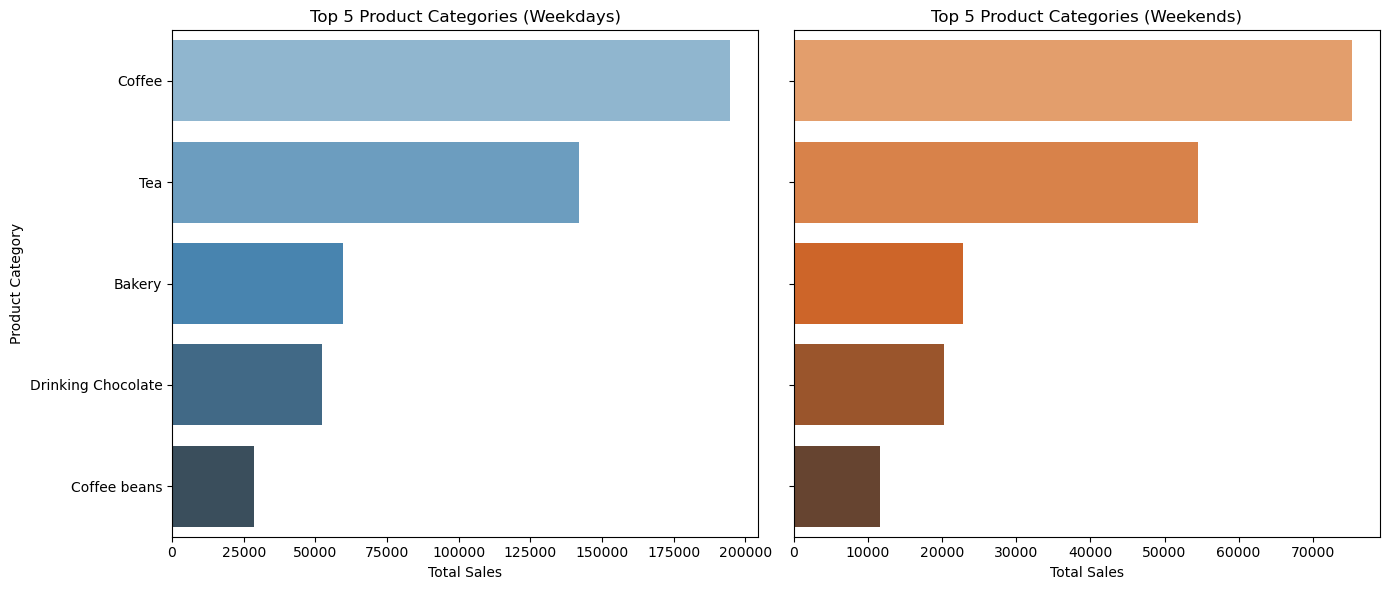

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Weekdays
sns.barplot(
    ax=axes[0],
    data=top_weekday,
    y='product_category',
    x='total_sales',
    palette='Blues_d'
)
axes[0].set_title('Top 5 Product Categories (Weekdays)')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Product Category')

# Weekends
sns.barplot(
    ax=axes[1],
    data=top_weekend,
    y='product_category',
    x='total_sales',
    palette='Oranges_d'
)
axes[1].set_title('Top 5 Product Categories (Weekends)')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Day of Week: Uncover weekly patterns

In [39]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,day_of_week,weekend,peak_weekday_hour,peak_weekend_hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01,7,6,True,10,10
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,7,6,True,10,10
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01,7,6,True,10,10
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01,7,6,True,10,10
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01,7,6,True,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06,20,4,False,10,10
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06,20,4,False,10,10
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06,20,4,False,10,10
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06,20,4,False,10,10


In [40]:
# Create a mapping from day_of_week integer to day name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average total sales per day of the week
avg_sales_by_day = df.groupby('day_of_week')['total_sales'].mean()
avg_sales_by_day.index = [day_names[d] for d in avg_sales_by_day.index]
print(avg_sales_by_day)

Monday       4.697929
Tuesday      4.690875
Wednesday    4.707346
Thursday     4.653541
Friday       4.671352
Saturday     4.724255
Sunday       4.661088
Name: total_sales, dtype: float64


In [41]:
# Calculate average total sales per day of the week
avg_sales_by_day = df.groupby('day_of_week')['total_sales'].mean()
avg_sales_by_day.index = [day_names[d] for d in avg_sales_by_day.index]
print(avg_sales_by_day)

Monday       4.697929
Tuesday      4.690875
Wednesday    4.707346
Thursday     4.653541
Friday       4.671352
Saturday     4.724255
Sunday       4.661088
Name: total_sales, dtype: float64


In [42]:
# Calculate total sales per day of the week
sales_per_day = df.groupby('day_of_week')['total_sales'].sum()
sales_per_day.index = [day_names[d] for d in sales_per_day.index]
print(sales_per_day)

Monday       101677.28
Tuesday       99455.94
Wednesday    100313.54
Thursday     100767.78
Friday       101373.00
Saturday      96894.48
Sunday        98330.31
Name: total_sales, dtype: float64


In [43]:
sales_per_day.to_csv('total_sales_per_day.csv', header=True)

TOTAL REVENEU PER CATAGORY

In [44]:
# Calculate total revenue per product category
revenue_per_category = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)
print(revenue_per_category)

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: total_sales, dtype: float64


In [45]:
# Save total revenue per product category to a CSV file
revenue_per_category.to_csv('revenue_per_product_category.csv', header=True)

In [46]:
# Calculate monthly revenue per product category
monthly_category_revenue = df.groupby(['month', 'product_category'])['total_sales'].sum().reset_index()

# Pivot for easier viewing
monthly_category_revenue_pivot = monthly_category_revenue.pivot(index='month', columns='product_category', values='total_sales')

print(monthly_category_revenue_pivot)

product_category    Bakery  Branded    Coffee  Coffee beans  \
month                                                         
2023-01            9535.75   1890.0  31256.85       5245.25   
2023-02            9038.82   1235.0  29268.95       4077.50   
2023-03           11902.58   1801.0  38303.60       5256.20   
2023-04           14021.70   2379.0  45971.20       6824.70   
2023-05           18565.52   2889.0  60362.85       8768.95   
2023-06           19251.27   3413.0  64789.00       9912.65   

product_category  Drinking Chocolate  Flavours  Loose Tea  Packaged Chocolate  \
month                                                                           
2023-01                      8337.75     974.4    1293.85              521.94   
2023-02                      8132.25     930.4    1277.85              451.02   
2023-03                     10253.50    1172.0    1646.95              588.20   
2023-04                     12266.75    1418.4    1829.15              873.23   
2023-05  

In [47]:
# Save the monthly revenue per product category pivot table to a CSV file
monthly_category_revenue_pivot.to_csv('monthly_revenue_per_product_category.csv', header=True)

Sales Growth (%) month-over-month revenue change.


In [48]:
# Calculate total monthly revenue
monthly_revenue = df.groupby('month')['total_sales'].sum().sort_index()

# Calculate month-over-month sales growth (%)
sales_growth = monthly_revenue.pct_change() * 100

# Combine into a DataFrame for display
sales_growth_df = pd.DataFrame({
    'monthly_revenue': monthly_revenue,
    'sales_growth_%': sales_growth
})

print(sales_growth_df)

         monthly_revenue  sales_growth_%
month                                   
2023-01         81677.74             NaN
2023-02         76145.19       -6.773633
2023-03         98834.68       29.797667
2023-04        118941.08       20.343466
2023-05        156727.76       31.769242
2023-06        166485.88        6.226159


In [65]:
# Calculate total sales growth percentage from January to June
jan_revenue = monthly_revenue.loc['2023-01']
jun_revenue = monthly_revenue.loc['2023-06']
total_growth_jan_jun_pct = ((jun_revenue - jan_revenue) / jan_revenue) * 100
print(f"Total sales growth from Jan to June: {total_growth_jan_jun_pct:.2f}%")

Total sales growth from Jan to June: 103.83%


In [49]:
# Save the sales growth DataFrame to a CSV file
sales_growth_df.to_csv('monthly_sales_growth.csv', header=True)

In [50]:
# Calculate monthly sales for each product (by 'product_detail')
product_monthly_sales = df.groupby(['month', 'product_detail'])['total_sales'].sum().reset_index()

# Pivot for easier visualization (products as columns, months as rows)
product_monthly_sales_pivot = product_monthly_sales.pivot(index='month', columns='product_detail', values='total_sales')

# Display the pivot table (showing first 10 products for brevity)
print(product_monthly_sales_pivot.iloc[:, :10])

# Optional: Save to CSV
product_monthly_sales_pivot.to_csv('product_monthly_sales.csv', header=True)

product_detail  Almond Croissant  Brazilian - Organic  Brazilian Lg  \
month                                                                 
2023-01                   810.00                360.0        1928.5   
2023-02                   761.25                414.0        1676.5   
2023-03                  1008.75                630.0        1991.5   
2023-04                  1226.25                630.0        2688.0   
2023-05                  1658.44                846.0        3353.0   
2023-06                  1703.44                972.0        3472.0   

product_detail  Brazilian Rg  Brazilian Sm  Cappuccino  Cappuccino Lg  \
month                                                                   
2023-01               1530.0        1150.6     1740.00        1938.00   
2023-02               1389.0        1012.0     1710.00        1912.50   
2023-03               2043.0        1289.2     2310.00        2647.75   
2023-04               2295.0        1628.0     2820.00        3000

In [51]:
# Calculate total monthly sales (for percentage calculation)
monthly_totals = df.groupby('month')['total_sales'].sum()

# Calculate monthly sales per product category
monthly_category_sales = df.groupby(['month', 'product_category'])['total_sales'].sum().reset_index()

# Merge with monthly totals to compute percentage
monthly_category_sales['monthly_total'] = monthly_category_sales['month'].map(monthly_totals)
monthly_category_sales['percentage'] = (monthly_category_sales['total_sales'] / monthly_category_sales['monthly_total']) * 100

# Pivot for easier visualization
monthly_category_percentage = monthly_category_sales.pivot(index='month', columns='product_category', values='percentage')

print(monthly_category_percentage)

product_category     Bakery   Branded     Coffee  Coffee beans  \
month                                                            
2023-01           11.674846  2.313972  38.268505      6.421884   
2023-02           11.870507  1.621902  38.438344      5.354902   
2023-03           12.042919  1.822235  38.755222      5.318174   
2023-04           11.788778  2.000150  38.650397      5.737883   
2023-05           11.845713  1.843324  38.514460      5.595020   
2023-06           11.563305  2.050024  38.915613      5.954048   

product_category  Drinking Chocolate  Flavours  Loose Tea  Packaged Chocolate  \
month                                                                           
2023-01                    10.208106  1.192981   1.584091            0.639024   
2023-02                    10.679926  1.221876   1.678176            0.592316   
2023-03                    10.374395  1.185819   1.666369            0.595135   
2023-04                    10.313300  1.192523   1.537862         

<Figure size 1200x700 with 0 Axes>

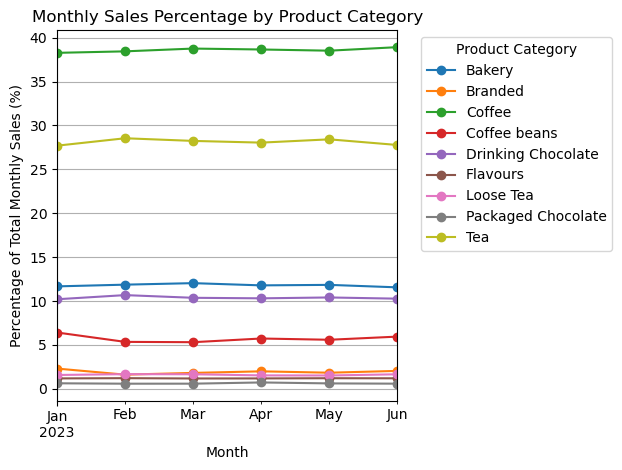

In [52]:
# Visualize monthly sales percentage per product category over time
plt.figure(figsize=(12, 7))
monthly_category_percentage.plot(marker='o')
plt.title('Monthly Sales Percentage by Product Category')
plt.ylabel('Percentage of Total Monthly Sales (%)')
plt.xlabel('Month')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

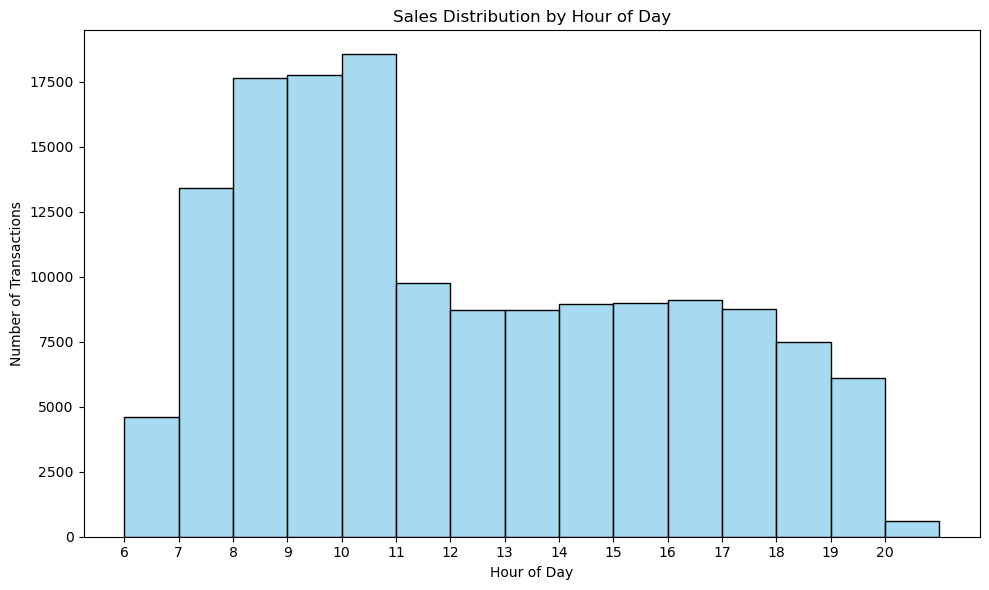

In [53]:
# Plot sales distribution by hour of day
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=range(df['hour'].min(), df['hour'].max() + 2), kde=False, color='skyblue')
plt.title('Sales Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(df['hour'].min(), df['hour'].max() + 1))
plt.tight_layout()
plt.show()

In [54]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['transaction_id', 'transaction_qty', 'store_id', 'product_id', 'unit_price', 'total_sales', 'hour', 'day_of_week', 'peak_weekday_hour', 'peak_weekend_hour']
Categorical columns: ['transaction_time', 'store_location', 'product_category', 'product_type', 'product_detail']


In [55]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,day_of_week,weekend,peak_weekday_hour,peak_weekend_hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,6,True,10,10
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,6,True,10,10
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,6,True,10,10
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,6,True,10,10
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,6,True,10,10


In [56]:
df.to_csv('coffee_shop_sales_cleaned.csv', index=False)

#LINEAR REGRESSION MODEL

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data: use monthly revenue for time series regression
monthly_revenue = df.groupby('month')['total_sales'].sum().sort_index()
months_numeric = np.arange(len(monthly_revenue)).reshape(-1, 1)

# Train linear regression model
model = LinearRegression()
model.fit(months_numeric, monthly_revenue.values)

# Predict revenue for the next 6 months
future_months = np.arange(len(monthly_revenue), len(monthly_revenue) + 6).reshape(-1, 1)
future_revenue_pred = model.predict(future_months)

# Display predictions
future_month_labels = [str(monthly_revenue.index[-1] + i + 1) for i in range(6)]
pred_df = pd.DataFrame({'Month': future_month_labels, 'Predicted_Revenue': future_revenue_pred})
print(pred_df)

     Month  Predicted_Revenue
0  2023-07      185058.202667
1  2023-08      204655.197238
2  2023-09      224252.191810
3  2023-10      243849.186381
4  2023-11      263446.180952
5  2023-12      283043.175524


In [58]:
pred_df.to_csv('future_monthly_revenue_predictions.csv', index=False)

In [59]:
# Calculate monthly revenue per store
monthly_store_revenue = df.groupby(['month', 'store_location'])['total_sales'].sum().sort_index()

# Calculate month-over-month revenue growth rate (%) for each store
revenue_growth_per_store = monthly_store_revenue.groupby('store_location').pct_change() * 100

# Combine into a DataFrame for display
revenue_growth_df = monthly_store_revenue.reset_index()
revenue_growth_df['revenue_growth_%'] = revenue_growth_per_store.values

print(revenue_growth_df)

      month   store_location  total_sales  revenue_growth_%
0   2023-01          Astoria     27313.66               NaN
1   2023-01   Hell's Kitchen     27820.65               NaN
2   2023-01  Lower Manhattan     26543.43               NaN
3   2023-02          Astoria     25105.34         -8.085039
4   2023-02   Hell's Kitchen     25719.80         -7.551405
5   2023-02  Lower Manhattan     25320.05         -4.608975
6   2023-03          Astoria     32835.43         30.790621
7   2023-03   Hell's Kitchen     33110.57         28.735721
8   2023-03  Lower Manhattan     32888.68         29.891845
9   2023-04          Astoria     39477.61         20.228698
10  2023-04   Hell's Kitchen     40304.14         21.725902
11  2023-04  Lower Manhattan     39159.33         19.066287
12  2023-05          Astoria     52428.76         32.806317
13  2023-05   Hell's Kitchen     52598.93         30.505030
14  2023-05  Lower Manhattan     51700.07         32.024910
15  2023-06          Astoria     55083.1

In [60]:
# Evaluate the linear regression model using mean squared error (MSE)
predicted_revenue = model.predict(months_numeric)
mse = mean_squared_error(monthly_revenue.values, predicted_revenue)
print(f"Mean Squared Error (MSE) of the model: {mse:.2f}")

Mean Squared Error (MSE) of the model: 92539908.97


In [61]:
from sklearn.metrics import mean_absolute_error, r2_score

# Additional evaluation metrics for regression models (like LinearRegression) include:


# Mean Absolute Error (MAE)
mae = mean_absolute_error(monthly_revenue.values, predicted_revenue)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (Coefficient of Determination)
r2 = r2_score(monthly_revenue.values, predicted_revenue)
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 8696.57
R-squared (R2): 0.9237


In [62]:
# Explanation of regression metrics

# MAE (Mean Absolute Error) of 8696.57 means that, on average, your model's monthly revenue predictions are off by about $8,697. 
# Whether this is "good" depends on the scale of your monthly revenues. For example, if your monthly revenues are around $80,000–$160,000 (as in your data), this error is about 5–10% of the actual values, which is generally acceptable for business forecasting.

# R-squared (R2) of 0.9237 means that about 92% of the variance in monthly revenue is explained by your model. 
# This is considered a very strong fit, indicating your model captures most of the trend in the data.

# In summary:
print("MAE is reasonable given your revenue scale, and R2 is excellent. Your model performs well for this dataset.")

MAE is reasonable given your revenue scale, and R2 is excellent. Your model performs well for this dataset.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features
df_rf = df.copy()
df_rf['month'] = df_rf['month'].astype(str)
features = ['month', 'store_location', 'product_category']
X = pd.get_dummies(df_rf[features])
y = df_rf['total_sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred):.4f}")

Random Forest MSE: 4.36
Random Forest R2: 0.5231


In [ ]:
!pip install prophet

09:00:34 - cmdstanpy - INFO - Chain [1] start processing
09:00:34 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
6  2023-06-30  184664.353154  172980.277337  196511.740108
7  2023-07-31  204858.393608  192546.423613  217009.263056
8  2023-08-31  225052.434063  212817.732204  236341.505284
9  2023-09-30  244595.053858  232038.956820  256888.840706
10 2023-10-31  264789.094312  252635.940909  277725.424325
11 2023-11-30  284331.714107  273034.687029  296331.096296


c:\Users\Atefah\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


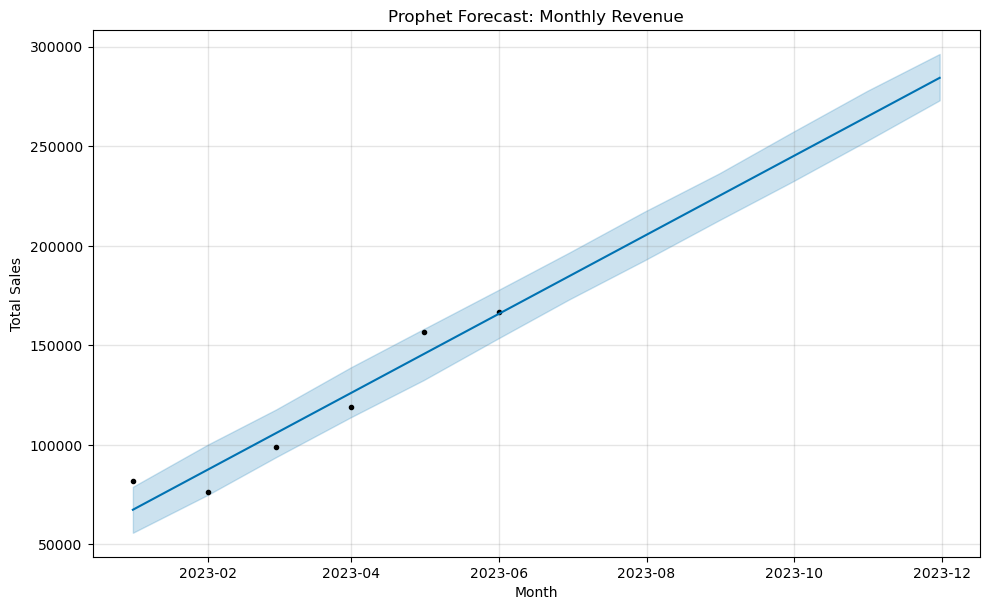

In [ ]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet: columns must be 'ds' (date) and 'y' (value)
prophet_df = monthly_revenue.reset_index()
prophet_df['ds'] = prophet_df['month'].dt.to_timestamp()
prophet_df['y'] = prophet_df['total_sales']
prophet_df = prophet_df[['ds', 'y']]

# Initialize and fit Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_df)

# Create a dataframe for future dates (next 6 months)
future = model_prophet.make_future_dataframe(periods=6, freq='M')

# Forecast
forecast = model_prophet.predict(future)

# Show forecast for future months
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

# Optional: Plot forecast
model_prophet.plot(forecast)
plt.title('Prophet Forecast: Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

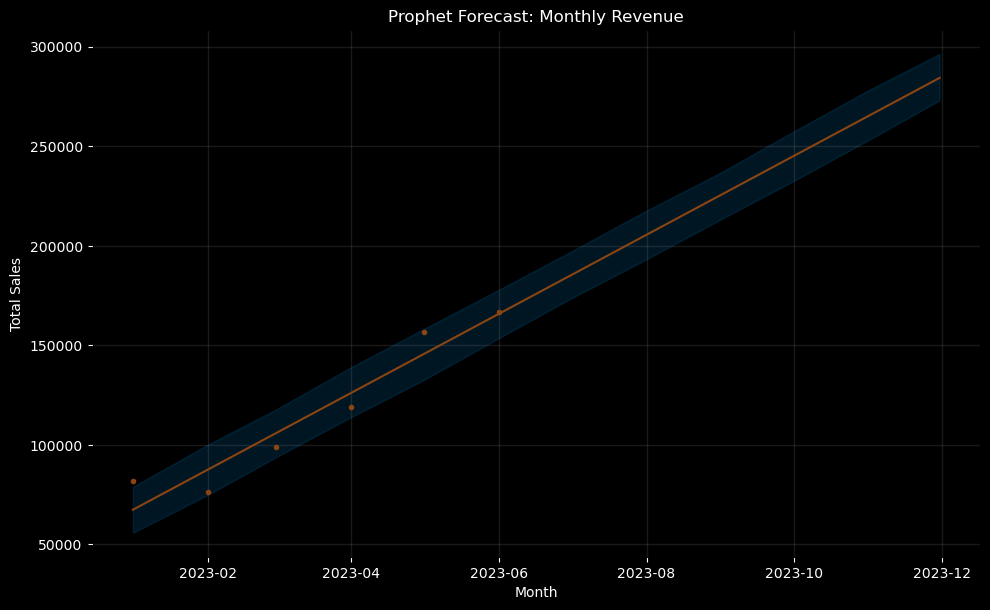

In [ ]:
# Custom visualization with black background, white fonts, and brown line

fig = model_prophet.plot(forecast, figsize=(10, 6))
ax = fig.gca()

# Set background and font colors
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set line color to brown
for line in ax.get_lines():
    line.set_color('#8B4513')  # brown

# Set legend text color to white
legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        text.set_color('white')

plt.title('Prophet Forecast: Monthly Revenue', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('Total Sales', color='white')
plt.show()

In [66]:
# Calculate total predicted sales growth from July to December 2023 in percentage
july_pred = future_revenue_pred[0]
dec_pred = future_revenue_pred[-1]
total_pred_growth_pct = ((dec_pred - july_pred) / july_pred) * 100
print(f"Total predicted sales growth from July to December 2023: {total_pred_growth_pct:.2f}%")

Total predicted sales growth from July to December 2023: 52.95%
